In [1]:
from polymer_parser import *

# Overview
The main objective from last time was to find a more efficient way to convert from "monomer information" to "substructure information". I finished two sprints testing two different ways of doing this:

    Sprint 1: get substructure information from the connectivity info found in a PDB file
    Sprint 2: get substructure information from User defined connectivity

Disclaimer: The current code is only guaranteed to work for "simple" and linear homopolymers. Once we define a direction forward today I will likely go back and rewrite code and such.

I also pushed for some "stretch goals" just to check out some different directions and possible features in the future

    Stretch Goal 1: Brute force charge generation
    Stretch Goal 2: Random Residue Graph generation
    


## Sprint 1: Monomer Info -> Substructure Info through a pdb file
This is the simplest case since the geometric information is easily packaged and only needs be extracted through partial graph isomorphisms. First, a monomer is stripped of its end groups (or "caps"). Then, this monomer is used to find isomorphisms in the pdb file. 

For a simple linear polymer with asymmetric end groups, there are usually 3 substructures found from the following isomorphisms:
1. Isomorphisms that "see" that they are surrounded by two neighboring monomer units
2. Isomorphisms that "see" one neighboring monomer but terminate on the other side
3. Isomorphisms that "see" one neighboring monomer but terminate on the other side (just in a slightly different way) 

In [2]:
smarts = "[C:1](-[H:2])(-[H:3])(-[H:4])-[C:5](-[H:6])=[C:7](-[C:8](-[H:9])(-[H:10])(-[H:11]))-[C:12](-[H:13])(-[H:14])(-[H:15])"
pdb_file = "polymer_examples/rdkit_simple_polymers/naturalrubber.pdb"
substruct_file = "automatic_rubber_substructures.json"

engine = NetworkxMonomerEngine()
engine.get_substructures_from_pdb("rubber", smarts, pdb_file, [2,14])
engine.output_substructures_json(substruct_file)
# visualize
engine = ChemistryEngine(pdb_file)
viz = PolymerVisualizer3D(engine)
viz.test_load(substruct_file, verbose=True)

1656002740243
rubber_1
[#6:1](-[H:2])(-[H:3])(-[#6:4](=[#6:5](-[H:6])-[#6:7](-[H:8])(-[H:9])[H:14])-[#6:10](-[H:11])(-[H:12])-[H:13])[#6]([#6]([#6]([#6]([H])[H])[#6]([H])([H])[H])[H])([H])[H]
rubber_2
[#6]([H])([H])([#6]([#6]([H])[#6]([H])[H])[#6]([H])([H])[H])[#6:7](-[#6:5](=[#6:4](-[#6:1](-[H:2])(-[H:3])[#6]([#6]([#6]([#6]([H])[H])[#6]([H])([H])[H])[H])([H])[H])-[#6:10](-[H:11])(-[H:12])-[H:13])-[H:6])(-[H:8])-[H:9]
rubber_3
[#6]([H])([H])([#6]([#6]([H])[#6]([H])[H])[#6]([H])([H])[H])[#6:8](-[#6:6](=[#6:5](-[#6:1](-[H:2])(-[H:3])-[H:4])-[#6:11](-[H:12])(-[H:13])[H:14])-[H:7])(-[H:9])-[H:10]
rubber_bond_1
[#6:1](-[H])(-[H])(-[#6](-[#6](-[H])-[#6](-[H])-[H])-[#6](-[H])(-[H])-[H])-[#6:1](-[#6](-[#6](-[#6](-[H])-[H])-[#6](-[H])(-[H])-[H])-[H])(-[H])-[H]
N. of assigned nodes: 106 -- N. of atoms: 106
N. of assigned edges: 105 -- N. of bonds: 105
0 {'atomic_number': 6, 'formal_charge': 0, 'atom_name': 'C', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched': True, 'connors_residue

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [3]:
smarts = "C(-[H])(-[H])(-[H])-C(-[H])(-[H])(-[Cl])"
pdb_file = "polymer_examples/rdkit_simple_polymers/polyvinylchloride.pdb"
substruct_file = "automatic_PVC_substructures.json"

engine = NetworkxMonomerEngine()
engine.get_substructures_from_pdb("PVC", smarts, pdb_file, [1,6])
engine.output_substructures_json(substruct_file)
# visualize
engine = ChemistryEngine(pdb_file)
viz = PolymerVisualizer3D(engine)
viz.test_load(substruct_file, verbose=True)

1656002740721
PVC_2
[#6]([#6:1](-[H:2])(-[#6:3](-[#17:4])(-[H:5])[#6]([#6]([#17])[H])([H])[H])-[H:6])([H])([#17])[#6]([H])[H]
PVC_3
[#6:1]([#6]([H])([#6]([#17])[H])[H])(-[H:2])(-[#17:3])-[#6:4](-[H:5])(-[H:6])[H:7]
PVC_4
[#6]([#17])([H])[#6:1](-[#6:2](-[#17:3])(-[H:4])[H:7])(-[H:5])-[H:6]
PVC_bond_1
[#6](-[#6:1](-[H])(-[#6:1](-[#17])(-[H])-[#6](-[H])-[H])-[H])(-[H])-[#17]
N. of assigned nodes: 62 -- N. of atoms: 62
N. of assigned edges: 61 -- N. of bonds: 61
0 {'atomic_number': 6, 'formal_charge': 0, 'atom_name': 'C', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched': True, 'connors_residue_name': 'PVC_3: [#6:1]([#6]([H])([#6]([#17])[H])[H])(-[H:2])(-[#17:3])-[#6:4](-[H:5])(-[H:6])[H:7]', 'connors_residue_number': 16, 'connors_atom_name': 'C1'}
Formal charge: 0
1 {'atomic_number': 6, 'formal_charge': 0, 'atom_name': 'C1', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched': True, 'connors_residue_name': 'PVC_2: [#6]([#6:1](-[H:2])(-[#6:3](-[#17:4])(-[H:5])[#6]([#6

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
smarts = "[C](-[H])(-[H])(-[H])-[O]-[C](-[H])(-[H])(-[H])"
pdb_file = "polymer_examples/rdkit_simple_polymers/PEO.pdb"
substruct_file = "automatic_PEO_substructures.json"

engine = NetworkxMonomerEngine()
engine.get_substructures_from_pdb("PEO", smarts, pdb_file, [1,7])
engine.output_substructures_json(substruct_file)
# visualize
engine = ChemistryEngine(pdb_file)
viz = PolymerVisualizer3D(engine)
viz.test_load(substruct_file, verbose=True)

1656002741191
PEO_1
[#6:1](-[#8:3]-[#6:2]([#6]([#8][#6]([H])[H])([H])[H])(-[H:7])-[H:8])(-[H:4])(-[H:5])[H:6]
PEO_2
[#6]([#8][#6]([#6:1](-[#8:3]-[#6:2]([#6]([#8][#6]([H])[H])([H])[H])(-[H:6])-[H:7])(-[H:4])-[H:5])([H])[H])([H])[H]
PEO_bond_1
[#6](-[#8]-[#6:1](-[#6:1](-[#8]-[#6](-[H])-[H])(-[H])-[H])(-[H])-[H])(-[H])-[H]
N. of assigned nodes: 86 -- N. of atoms: 86
N. of assigned edges: 116 -- N. of bonds: 85
0 {'atomic_number': 6, 'formal_charge': 0, 'atom_name': 'C1', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched': True, 'connors_residue_name': 'PEO_1: [#6:1](-[#8:3]-[#6:2]([#6]([#8][#6]([H])[H])([H])[H])(-[H:7])-[H:8])(-[H:4])(-[H:5])[H:6]', 'connors_residue_number': 1, 'connors_atom_name': 'C1'}
Formal charge: 0
1 {'atomic_number': 6, 'formal_charge': 0, 'atom_name': 'C2', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched': True, 'connors_residue_name': 'PEO_1: [#6:1](-[#8:3]-[#6:2]([#6]([#8][#6]([H])[H])([H])[H])(-[H:7])-[H:8])(-[H:4])(-[H:5])[H:6]', 'conno

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Sprint 2: Monomer Info -> Substructure Info through User Defined Connectivity 
This approach does not need a pdb file to work, but complexity can scale extremely quickly beyond linear homopolymers. For a simple linear polymer, the user need only specify a smarts with certain tagged atoms and a connectivity dictionary. For example, with PEO, the smarts would be: `[C:1](-[H])(-[H])(-[H])-[O]-[C:2](-[H])(-[H])(-[H])` (note the two tagged carbons), and the connectivity dictionary would be {1:2}. This arrange monomers so that carbon 1 is bonded to carbon 2.

In [5]:
smarts = "[C:1](-[H])(-[H])(-[H])-[C](-[H])=[C](-[C](-[H])(-[H])(-[H]))-[C:2](-[H])(-[H])(-[H])"
pdb_file = "polymer_examples/rdkit_simple_polymers/naturalrubber.pdb"
substruct_file = "automatic_rubber_substructures.json"

engine = NetworkxMonomerEngine()
engine.get_substructures_from_connections("rubber", smarts, {1:2}, [2,14])
engine.output_substructures_json(substruct_file)
# visualize
engine = ChemistryEngine(pdb_file)
viz = PolymerVisualizer3D(engine)
viz.test_load(substruct_file, verbose=True)

[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])=[C:6](-[C:7](-[#1:8])(-[#1:9])-[#1:10])-[C:11](-[#1:12])(-[#1:13])-C(-[#1])(-[#1])-C(-[#1])=C(-C(-[#1])(-[#1])-[#1])-C(-[#1])-[#1])-C(-C(=C(-C(-[#1])-[#1])-[#1])-C(-[#1])(-[#1])-[#1])(-[#1])-[#1]
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])=[C:6](-[C:7](-[#1:8])(-[#1:9])-[#1:10])-[C:11](-[#1:12])(-[#1:13])-[#1:14])-C(-C(=C(-C(-[#1])-[#1])-[#1])-C(-[#1])(-[#1])-[#1])(-[#1])-[#1]
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])=[C:6](-[C:7](-[#1:8])(-[#1:9])-[#1:10])-[C:11](-[#1:12])(-[#1:13])-C(-[#1])(-[#1])-C(-[#1])=C(-C(-[#1])(-[#1])-[#1])-C(-[#1])-[#1])-[#1:14]
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])=[C:6](-[C:7](-[#1:8])(-[#1:9])-[#1:10])-[C:11](-[#1:12])(-[#1:13])-[#1:15])-[#1:14]
[C:1](-[#1])(-[#1])(-C(-[#1])=C(-C(-[#1])(-[#1])-[#1])-C(-[#1])-[#1])-[C:1](-C(=C(-C(-[#1])-[#1])-[#1])-C(-[#1])(-[#1])-[#1])(-[#1])-[#1]
1656002741411
rubber_1
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])=[C:6](-[C:7](-[#1:8])(-[#1:9])-[#1:10])-[C:11](-[#1:12])(-[#1:13])-C(-[#1])(-[#

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
smarts = "[C:1](-[H])(-[H])(-[H])-[C:2](-[H])(-[H])(-[Cl])"
pdb_file = "polymer_examples/rdkit_simple_polymers/polyvinylchloride.pdb"
substruct_file = "automatic_PVC_substructures.json"

engine = NetworkxMonomerEngine()
engine.get_substructures_from_connections("PVC", smarts, {1:2}, [1,6])
engine.output_substructures_json(substruct_file)
# visualize
engine = ChemistryEngine(pdb_file)
viz = PolymerVisualizer3D(engine)
viz.test_load(substruct_file, verbose=True)

[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-C(-[#1])(-[#1])-C(-[#1])-Cl)-C(-C(-[#1])-[#1])(-[#1])-Cl
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-[#1:7])-C(-C(-[#1])-[#1])(-[#1])-Cl
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-C(-[#1])(-[#1])-C(-[#1])-Cl)-[#1:7]
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-[#1:8])-[#1:7]
[C:1](-[#1])(-[#1])(-C(-[#1])-Cl)-[C:1](-C(-[#1])-[#1])(-[#1])-Cl
1656002741767
PVC_1
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-C(-[#1])(-[#1])-C(-[#1])-Cl)-C(-C(-[#1])-[#1])(-[#1])-Cl
PVC_2
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-[#1:7])-C(-C(-[#1])-[#1])(-[#1])-Cl
PVC_3
[C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-C(-[#1])(-[#1])-C(-[#1])-Cl)-[#1:7]
PVC_bond_1
[C:1](-[#1])(-[#1])(-C(-[#1])-Cl)-[C:1](-C(-[#1])-[#1])(-[#1])-Cl
N. of assigned nodes: 62 -- N. of atoms: 62
N. of assigned edges: 61 -- N. of bonds: 61
0 {'atomic_number': 6, 'formal_charge': 0, 'atom_name': 'C', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched

30 {'atomic_number': 6, 'formal_charge': 0, 'atom_name': 'Ca', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched': True, 'connors_residue_name': 'PVC_1: [C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-C(-[#1])(-[#1])-C(-[#1])-Cl)-C(-C(-[#1])-[#1])(-[#1])-Cl', 'connors_residue_number': 8, 'connors_atom_name': 'C1'}
Formal charge: 0
31 {'atomic_number': 1, 'formal_charge': 0, 'atom_name': 'Hf', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched': True, 'connors_residue_name': 'PVC_1: [C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-C(-[#1])(-[#1])-C(-[#1])-Cl)-C(-C(-[#1])-[#1])(-[#1])-Cl', 'connors_residue_number': 8, 'connors_atom_name': 'H1'}
Formal charge: 0
32 {'atomic_number': 6, 'formal_charge': 0, 'atom_name': 'Cb', 'residue_name': 'UNL', 'residue_number': 0, 'already_matched': True, 'connors_residue_name': 'PVC_1: [C:1](-[#1:2])(-[#1:3])(-[C:4](-[#1:5])(-[Cl:6])-C(-[#1])(-[#1])-C(-[#1])-Cl)-C(-C(-[#1])-[#1])(-[#1])-Cl', 'connors_residue_number': 8, 'connors_

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
smarts = "[C:1](-[H])(-[H])(-[H])-[O]-[C:2](-[H])(-[H])(-[H])"
pdb_file = "polymer_examples/rdkit_simple_polymers/PEO.pdb"
substruct_file = "automatic_PEO_substructures.json"

engine = NetworkxMonomerEngine()
engine.get_substructures_from_connections("PEO", smarts, {1:2}, [1,7])
engine.output_substructures_json(substruct_file)
# visualize
engine = ChemistryEngine(pdb_file)
viz = PolymerVisualizer3D(engine)
viz.test_load(substruct_file, verbose=True)

[C:1](-[#1:2])(-[#1:3])(-[O:4]-[C:5](-[#1:6])(-[#1:7])-C(-[#1])(-[#1])-O-C(-[#1])-[#1])-C(-O-C(-[#1])-[#1])(-[#1])-[#1]
[C:1](-[#1:2])(-[#1:3])(-[O:4]-[C:5](-[#1:6])(-[#1:7])-[#1:8])-C(-O-C(-[#1])-[#1])(-[#1])-[#1]
[C:1](-[#1:2])(-[#1:3])(-[O:4]-[C:5](-[#1:6])(-[#1:7])-C(-[#1])(-[#1])-O-C(-[#1])-[#1])-[#1:8]
[C:1](-[#1:2])(-[#1:3])(-[O:4]-[C:5](-[#1:6])(-[#1:7])-[#1:9])-[#1:8]
[C:1](-[#1])(-[#1])(-O-C(-[#1])-[#1])-[C:1](-O-C(-[#1])-[#1])(-[#1])-[#1]
1656002742099
PEO_1
[C:1](-[#1:2])(-[#1:3])(-[O:4]-[C:5](-[#1:6])(-[#1:7])-C(-[#1])(-[#1])-O-C(-[#1])-[#1])-C(-O-C(-[#1])-[#1])(-[#1])-[#1]
PEO_2
[C:1](-[#1:2])(-[#1:3])(-[O:4]-[C:5](-[#1:6])(-[#1:7])-[#1:8])-C(-O-C(-[#1])-[#1])(-[#1])-[#1]
PEO_3
[C:1](-[#1:2])(-[#1:3])(-[O:4]-[C:5](-[#1:6])(-[#1:7])-C(-[#1])(-[#1])-O-C(-[#1])-[#1])-[#1:8]
PEO_bond_1
[C:1](-[#1])(-[#1])(-O-C(-[#1])-[#1])-[C:1](-O-C(-[#1])-[#1])(-[#1])-[#1]
N. of assigned nodes: 86 -- N. of atoms: 86
N. of assigned edges: 120 -- N. of bonds: 85
0 {'atomic_number': 6, 'formal

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Discussion Point: Complexity of the Sprint 2 Approach


## Stretch Goal 1: Brute force charge generation
Works very closely with Sprint 1 Method. After Substructures are generated, the `BruteForceParameterEstimator` class:
1. loads a molecule from pdb
2. gets charges
3. finds isomorphisms between the generated substructures and the molecule
4. averages charges for the found isomorphisms and stored them in a library charge entry for each substructure

The main takeaway here is that, generally, if you generate substructures that can load a pdb with chemical information, those same substructures can be used to generate Library Charges

## Stretch Goal 2: Random Residue Graph generation
Inspired by Nate's talk on: https://doi.org/10.1038/s41467-021-27627-4

At some point in the future, it may become necessary to build polymers (for example, random PEGylation of a protein, or building a protein from its amino acid text encoding). I wanted to see how difficult it would be to store polymer information at the residue level (ie. each node in the graph is a residue), create a polymer by adding residues randomly, and transitioning to the atomistic resolution. For now (as before), this only works with homopolymers. For this approach, each

node stores the information:

    name: (what residue type/identification I am)
    open_bonds: (what bonds out of the residue still need to be filled by a terminal group or another monomer)
    
edge stores the information:

    bond_info: {node 1: bond type comming from node 1, node 2: bond type going to node 2}
    
^^ by "bond type comming from/going to" I mean something like the atom map numbers used before to differentiate different types of monomer connections. 

After a residue graph has been created, the last step is to go through and fill in the residues with their respective atoms with the proper bonds between the residues (for now, this only allows for single bonds between residues). 

### Example for a simple homopolymer

In [8]:
from openff.toolkit.topology import Molecule
from rdkit import Chem

[C:1](-[#1])(-[#1])(-O-[C:2](-[#1])(-[#1])-[C:1](-[#1])(-[#1])-O-[C:2](-[#1])(-[#1])-[C:1](-[#1])(-[#1])-O-[C:2](-[#1])(-[#1])-[C:1](-[#1])(-[#1])-O-[C:2](-[#1])(-[#1])-[C:1](-[#1])(-[#1])-O-[C:2](-[#1])(-[#1])-[C:1](-[#1])(-[#1])-O-[C:2](-[#1])(-[#1])-[#1:1])-[C:2](-O-[C:1](-[#1])(-[#1])-[C:2](-O-[C:1](-[#1])(-[#1])-[C:2](-O-[C:1](-[#1])(-[#1])-[C:2](-O-[C:1](-[#1])(-[#1])-[#1:1])(-[#1])-[#1])(-[#1])-[#1])(-[#1])-[#1])(-[#1])-[#1]


/home/coda3831/anaconda3/envs/test/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/coda3831/anaconda3/envs/test/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/coda3831/anaconda3/envs/test/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/coda3831/anaconda3/envs/test/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


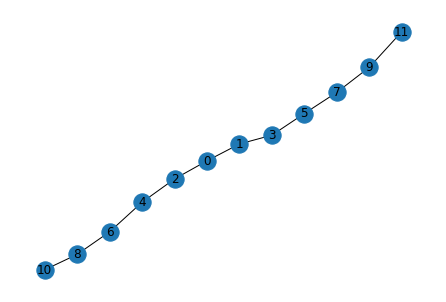

In [9]:
smarts = "[C:1](-[H])(-[H])(-[H])-[O]-[C:2](-[H])(-[H])(-[H])"

engine = NetworkxMonomerEngine()
rdmol, graph = engine.build_random_polymer_from_connection_dict("PEO", smarts, {1:2}, [1,7], length=10)
print(Chem.MolToSmarts(rdmol))
mol = Molecule.from_rdkit(rdmol, hydrogens_are_explicit = True)
nx.draw(graph, pos = nx.kamada_kawai_layout(graph), with_labels=True)

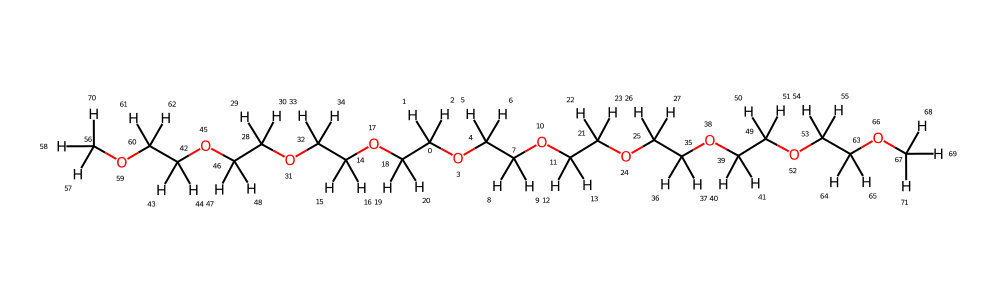

In [10]:
mol.visualize(width=1000)